In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pylab import rcParams
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import adfuller
from time import time
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
rcParams['figure.figsize']= 20, 5
import warnings
warnings.filterwarnings('ignore','No frequency information was')

<!-- time series decomposition is a process of deconstructing a time series into the following components:

Trend — general movement over time
Seasonal — behaviors captured in individual seasonal periods
Residual — everything not captured by trend and seasonal components -->

In [3]:
df=pd.read_csv('D:\\Data_sets\\time_series\\amazon_revenue_profit.csv')
df

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561
...,...,...,...
56,3/31/2006,2279,51
57,12/31/2005,2977,199
58,9/30/2005,1858,30
59,6/30/2005,1753,52


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Quarter     61 non-null     object
 1   Revenue     61 non-null     int64 
 2   Net Income  61 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [6]:
df=df[['Quarter','Revenue']]

In [7]:
df

,Quarter,Revenue
0,3/31/2020,75452
1,12/31/2019,87437
2,9/30/2019,69981
3,6/30/2019,63404
4,3/31/2019,59700
...,...,...
56,3/31/2006,2279
57,12/31/2005,2977
58,9/30/2005,1858
59,6/30/2005,1753


In [9]:
df['Quarter']=pd.to_datetime(df.Quarter)

<ipython-input-9-6362d616d37a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter']=pd.to_datetime(df.Quarter)


In [10]:
df.set_index('Quarter', inplace=True)

In [11]:
ts=df.Revenue

In [12]:
ts

Quarter
2020-03-31    75452
2019-12-31    87437
2019-09-30    69981
2019-06-30    63404
2019-03-31    59700
              ...  
2006-03-31     2279
2005-12-31     2977
2005-09-30     1858
2005-06-30     1753
2005-03-31     1902
Name: Revenue, Length: 61, dtype: int64

In [49]:
ts=ts.iloc[::-1]

Text(0, 0.5, 'Revenue')

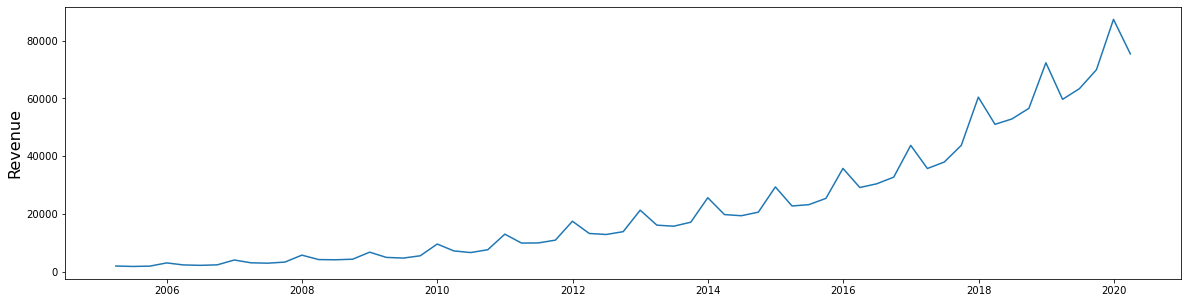

In [50]:
plt.plot(ts)
plt.ylabel('Revenue', fontsize=16)

In [51]:
from statsmodels.tsa.stattools import kpss

In [52]:
kpss(ts)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


(0.582743240332794,
 0.024205159969745996,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [53]:
kpss(ts,'ct')

(0.1700516821083104,
 0.029956931576407997,
 11,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [54]:
## ADA test for 95% confidence ( alpha is 0.05)

def adafuller_test(data, alpha):
    adfuller_result=adfuller(data)
    
    print(f'ADF Statistic: {adfuller_result[0]}\n')
    print(f'p-value: {adfuller_result[1]}\n')
    
    for key, value in adfuller_result[4].items():
        print(f'Critial Values: {key}, {value}')
    
    if adfuller_result[1] <= alpha:
        print(f"\nFor Significance level ({alpha}), there is Strong evidence against H0 , Reject H0, Time Series is Stationary")
    else:
        print(f"\nFor Significance level ({alpha}), there is Weak evidence against H0 , Fail to reject H0, Time Series is Not-Stationary ")
        

In [55]:
adafuller_test(ts,0.05)

ADF Statistic: 5.090085181861927

p-value: 1.0

Critial Values: 1%, -3.5552728880540942
Critial Values: 5%, -2.9157312396694217
Critial Values: 10%, -2.5956695041322315

For Significance level (0.05), there is Weak evidence against H0 , Fail to reject H0, Time Series is Not-Stationary 


In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [57]:
# Additive Decomposition
add_result = seasonal_decompose(ts, model='additive',period=1)


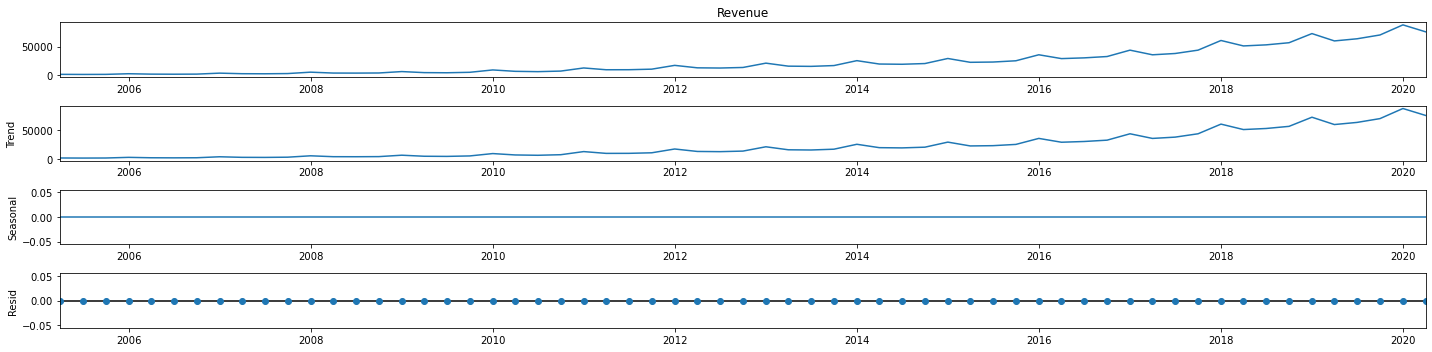

In [66]:
add_result.plot()
plt.show()

In [59]:
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head()

,seasoanilty,trend,residual,actual_values
Quarter,,,,
2005-03-31,0.0,1902.0,0.0,1902.0
2005-06-30,0.0,1753.0,0.0,1753.0
2005-09-30,0.0,1858.0,0.0,1858.0
2005-12-31,0.0,2977.0,0.0,2977.0
2006-03-31,0.0,2279.0,0.0,2279.0


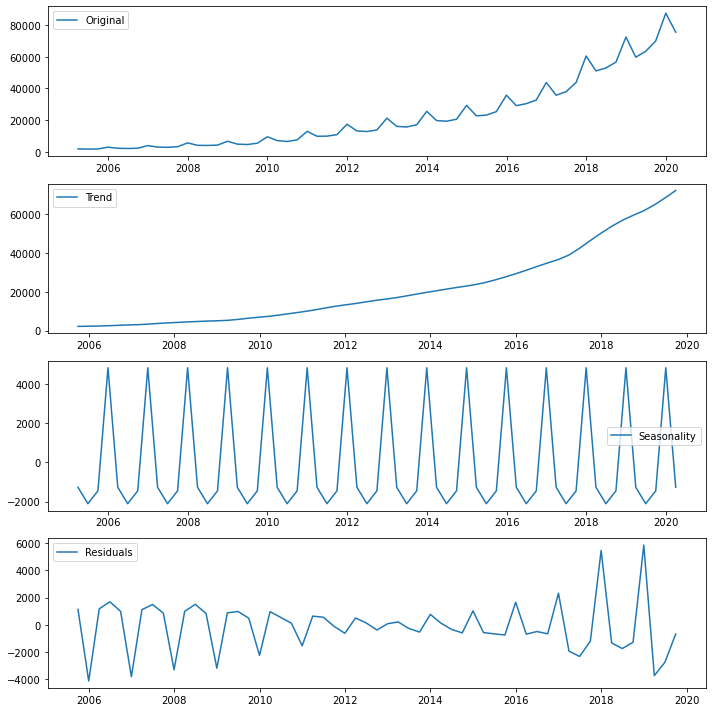

In [67]:
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [60]:
# Multiplicative Decomposition 
mul_result = seasonal_decompose(ts, model='multiplicative')

<Figure size 720x288 with 0 Axes>

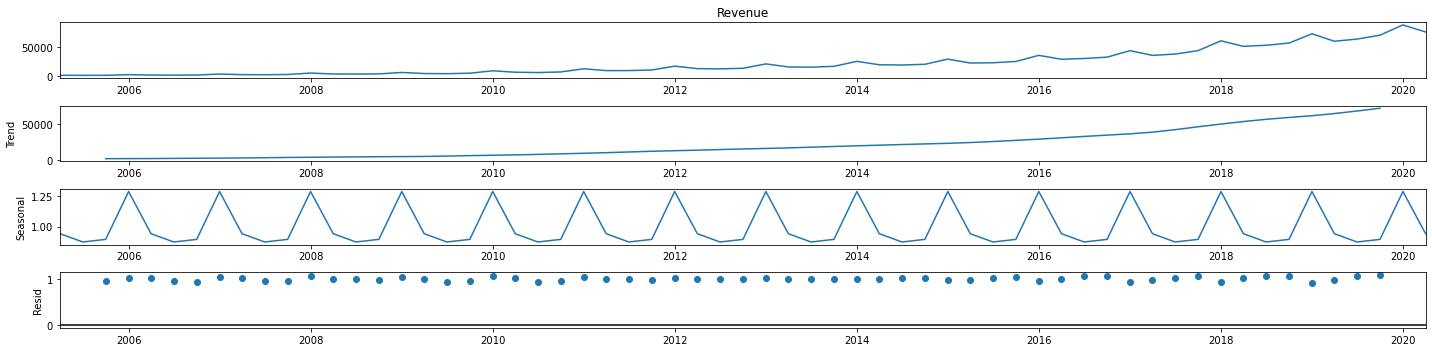

In [61]:
plt.figure(figsize = (10,4))
mul_result.plot()
plt.show()

In [62]:
new_df_add = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head()

,seasoanilty,trend,residual,actual_values
Quarter,,,,
2005-03-31,0.941840,NaN,NaN,1902.0
2005-06-30,0.873649,NaN,NaN,1753.0
2005-09-30,0.894993,2169.625,0.956844,1858.0
2005-12-31,1.289518,2265.000,1.019256,2977.0
2006-03-31,0.941840,2369.375,1.021253,2279.0


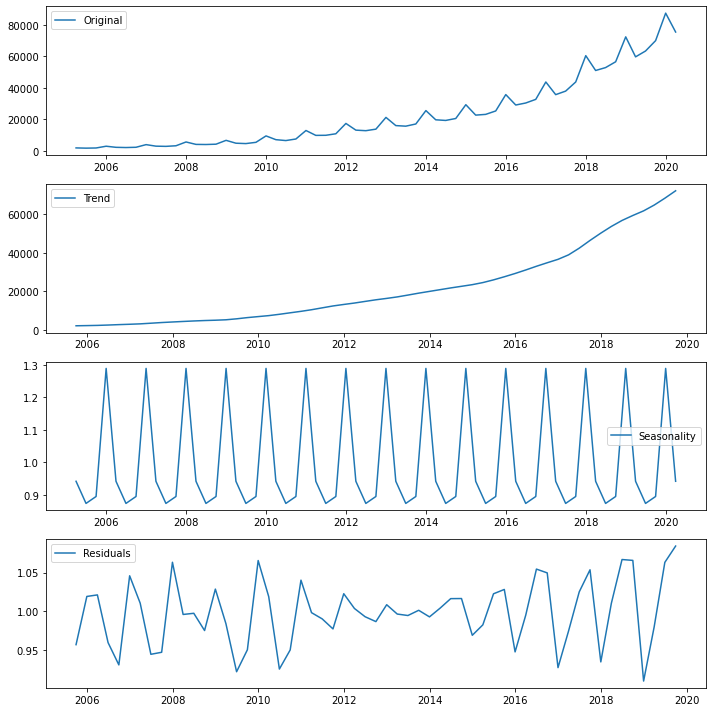

In [68]:

decomposition = seasonal_decompose(ts, model='mulplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()